# 2-7-1. 데이터 추가 처리

In [2]:
# 데이터셋 healthcare-dataset-2.csv 불러오기.



(4194, 12)

In [3]:
# 변수 데이터 타입 확인.


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
# 성별(gender) 개수 기준 분포 구하기.



Female    2543
Male      1650
Other        1
Name: gender, dtype: int64

In [5]:
# 성별(gender) 비율 기준 분포 구하기.



Female    0.606342
Male      0.393419
Other     0.000238
Name: gender, dtype: float64

In [ ]:
# 위의 gender 변수에 대한 작업을 나머지 범주형 변수에 대해 다 해 줘야 함.
# 이를 위해 아래 코딩을 고안함.

In [6]:
# 범주형 변수를 cols1에 저장.



# 데이터프레임 df1안의 컬럼명을 순차적으로 value_counts() 구문에 넣어서 결과 출력.






---- gender ---
Female    0.606342
Male      0.393419
Other     0.000238
Name: gender, dtype: float64

---- hypertension ---
0    0.881497
1    0.118503
Name: hypertension, dtype: float64

---- heart_disease ---
0    0.93443
1    0.06557
Name: heart_disease, dtype: float64

---- ever_married ---
Yes    0.799237
No     0.200763
Name: ever_married, dtype: float64

---- work_type ---
Private          0.653314
Self-employed    0.191702
Govt_job         0.154506
Never_worked     0.000477
Name: work_type, dtype: float64

---- residence_type ---
Urban    0.510491
Rural    0.489509
Name: residence_type, dtype: float64

---- smoking_status ---
never smoked       0.411779
formerly smoked    0.204340
Unknown            0.199094
smokes             0.184788
Name: smoking_status, dtype: float64


In [7]:
# 데이터프레임 df의 변수명 열거.


['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [8]:
# 결혼 유무(ever_married) 값 개수 비교.


Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
# 범주형 변수 값이 문자형(Character) 값인 것들을 숫자형으로 대체해야 함.
# 사유는 머신러닝에서 사용할 Scikit-learn 라이브러리는 숫자형 데이터만 다룸.

In [8]:
# OrdinalEncoder를 통해 위의 작업을 변수별로 수행.



ever_married  ever_married_encoded
No            0.0                      842
Yes           1.0                     3352
dtype: int64

In [9]:
df['gender_encoded'] = OrdinalEncoder().fit_transform(df['gender'].values.reshape(-1,1))
df.groupby(['gender', 'gender_encoded']).size()   # 변경전후 변수값 비교표 디스플레이.

gender  gender_encoded
Female  0.0               2543
Male    1.0               1650
Other   2.0                  1
dtype: int64

In [10]:
df['work_type_encoded'] = OrdinalEncoder().fit_transform(df['work_type'].values.reshape(-1,1))
df.groupby(['work_type', 'work_type_encoded']).size()   # 변경전후 변수값 비교표 디스플레이.

work_type      work_type_encoded
Govt_job       0.0                   648
Never_worked   1.0                     2
Private        2.0                  2740
Self-employed  3.0                   804
dtype: int64

In [11]:
df['residence_type_encoded'] = OrdinalEncoder().fit_transform(df['residence_type'].values.reshape(-1,1))
df.groupby(['residence_type', 'residence_type_encoded']).size()   # 변경전후 변수값 비교표 디스플레이.

residence_type  residence_type_encoded
Rural           0.0                       2053
Urban           1.0                       2141
dtype: int64

In [12]:
df['smoking_status_encoded'] = OrdinalEncoder().fit_transform(df['smoking_status'].values.reshape(-1,1))
df.groupby(['smoking_status', 'smoking_status_encoded']).size()   # 변경전후 변수값 비교표 디스플레이.

smoking_status   smoking_status_encoded
Unknown          0.0                        835
formerly smoked  1.0                        857
never smoked     2.0                       1727
smokes           3.0                        775
dtype: int64

In [13]:
# 데이터프레임 df 컬럼명 재확인.


['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke',
 'ever_married_encoded',
 'gender_encoded',
 'work_type_encoded',
 'residence_type_encoded',
 'smoking_status_encoded']

In [14]:
# 범주형 변수 값을 문자형에서 숫자형으로 만든 _encoded 꼬리표가 달린 변수들을 만들었으니
# 이제는 원래 범주형 변수중에 문자형인 변수명을 지워야 함.
# 거기에 분석에서 이제는 필요없는 ID변수도 제거.


In [15]:
# 데이터프레임 df 컬럼명 재확인.


['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'ever_married_encoded',
 'gender_encoded',
 'work_type_encoded',
 'residence_type_encoded',
 'smoking_status_encoded']

In [16]:
# 데이터프레임 df 행과 열 개수 확인.


(4194, 11)

In [18]:
# 결측값을 갖고 있는 변수명(컬럼명) 찾기.


bmi    True
dtype: bool

In [19]:
# 체질량 지수(bmi) 값 중에 결측값 개수 확인.


180

In [20]:
# 지금까지 작업한 데이터프레임 df를 healthcare-dataset-3.csv로 저장.
df.to_csv('healthcare-dataset-3.csv', index=False)

# 2-7-2. 데이터 분할 및 대체

In [21]:
# 방금 저장한 healthcare-dataset-3.csv 파일 불러오기.


(4194, 11)

In [22]:
# 변수의 데이터 타입 확인.


age                       float64
hypertension                int64
heart_disease               int64
avg_glucose_level         float64
bmi                       float64
stroke                      int64
ever_married_encoded      float64
gender_encoded            float64
work_type_encoded         float64
residence_type_encoded    float64
smoking_status_encoded    float64
dtype: object

In [23]:
# Next 코딩문에서 이 코딩 결과를 활용하기 때문에 데이터 프레임 df 컬럼명 재나열.


['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'ever_married_encoded',
 'gender_encoded',
 'work_type_encoded',
 'residence_type_encoded',
 'smoking_status_encoded']

In [24]:
# 범주형 변수들의 dtype이 현재 float64로 되어 있는데 이를 category로 변경.

# dtype을 category로 지정해 줄 변수들을 cols2에 임시 저장.


# cols2에 저장된 변수들의 dtype을 category로 변경.


In [25]:
# 변수의 데이터 타입 재확인.


age                        float64
hypertension              category
heart_disease             category
avg_glucose_level          float64
bmi                        float64
stroke                    category
ever_married_encoded      category
gender_encoded            category
work_type_encoded         category
residence_type_encoded    category
smoking_status_encoded    category
dtype: object

In [26]:
# 변수를 타겟변수와 나머지 변수(입력변수라 함)로 분리.



In [27]:
# 입력변수만 모은 data의 행과 열 개수 확인.


(4194, 10)

In [29]:
# data의 타입 확인 --> 데이터프레임


pandas.core.frame.DataFrame

In [30]:
# 타겟변수(stroke)만 모은 target의 행과 열 개수 확인.


(4194,)

In [31]:
# target의 타입 확인 --> 시리즈


pandas.core.series.Series

In [ ]:
### 그렇다면 데이터프레임과 시리즈의 차이점은 무엇인가? --> 후속 강의 중에 설명 예정.

In [32]:
# 타겟변수(stroke) 값 개수 확인 --> unbalanced 분포.


0    3947
1     247
Name: stroke, dtype: int64

In [33]:
# 타겟변수(stroke) 값 비율 확인 --> unbalanced 분포 (약 94:6).


0    0.941106
1    0.058894
Name: stroke, dtype: float64

In [ ]:
# 타겟변수 값이 위와 같이 심하게 unbalanced 분포를 보이면 머신러닝 결과를 왜곡할 수 있음.
# 따라서 imblearn_learn 패키지를 설치해서 이를 바로 잡으려고 함.

In [55]:
pip install imbalanced_learn

     |████████████████████████████████| 215kB 1.9MB/s eta 0:00:01
     |████████████████████████████████| 7.2MB 8.6MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
Note: you may need to restart the kernel to use updated packages.


In [34]:
import imblearn
print(imblearn.__version__)

0.8.0


In [35]:
# imb_learn 패키지의 RandomUnderSampler 기능을 통해 
# 타겟변수의 0가 1 값의 비율을 1:3으로 조정.



In [36]:
# RandomUnderSampler를 적용한 target_under의 값 개수 확인.


0    741
1    247
Name: stroke, dtype: int64

In [37]:
# RandomUnderSampler를 적용한 target_under의 값 비율 확인.


0    0.75
1    0.25
Name: stroke, dtype: float64

In [38]:
# 50:50 데이터 분할(data partition).
# stratify = target_under에 유의!


In [39]:
# y_train의 값 비율 분포 확인.


0    0.748988
1    0.251012
Name: stroke, dtype: float64

In [41]:
# y_train의 값 개수 분포 확인.


0    370
1    124
Name: stroke, dtype: int64

In [46]:
# 구간 변수 중 체질량 지수(bmi)는 아직도 결측값을 갖고 있음.
# 머신러닝을 돌리는 sklearn 라이브러리는 결측값이 있으면 돌아가지 않으므로 (황당하지만 그러함)
# 구간 변수의 결측값을 일괄적으로 해당 변수값의 평균(mean)으로 대체(imputation). 



X_train2 shape: (494, 10)
X_test2 shape: (494, 10)


# 4-7-3. Decision Tree 모델

In [43]:
# Decision Tree 모델 방법 1
# Decision Tree 모델 (Default인 GINI기준이자 Maximal depth 조건).



Accuracy(GINI) on training set:1.00000
Accuracy(GINI) on test set:0.69838


In [47]:
# Decision Tree 모델 방법 2
# Decision Tree 모델 (Default인 GINI기준이자 Maximal depth 조건).



Accuracy(GINI) on training set:1.00000
Accuracy(GINI) on test set:0.69838


In [48]:
### 앞에서 한 데이터 분할, 데이터 대체, 그리고 Decision Tree 모델을 일괄 수행하는 코딩!

# 50:50 Data partition


# interval 변수의 null value를 평균(mean)으로 impute. 


# Decision Tree 모델 (Default인 GINI기준이자 Maximal depth 조건).



Accuracy(GINI) on training set:1.00000
Accuracy(GINI) on test set:0.69838


# 2021-06-1강 자료 준비 끝.

# 2021-06-2강 자료 준비 시작 (예정)

In [134]:
# Decision Tree 모형 Gini 기준(Default 설정)에서 Best Model.
# Decision Tree depth=5
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=5)   # Tree 최대 depth를 10으로 설정. 
model = clf.fit(X_train2, y_train)

print("Accuracy(by GINI) on training set:{:.5f}".format(model.score(X_train2, y_train))) 
print("Accuracy(by GINI) on test set:{:.5f}".format(model.score(X_test2, y_test)))

Accuracy(by GINI) on training set:0.85223
Accuracy(by GINI) on test set:0.74494


In [132]:
# Decision Tree 모형 Entropy 기준에서 Best Model.
# DecisionTree depth=5
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=5)
model = clf.fit(X_train2, y_train)

print("Accuracy(by Entropy) on training set:{:.5f}".format(model.score(X_train2, y_train))) 
print("Accuracy(by Entropy) on test set:{:.5f}".format(model.score(X_test2, y_test)))

Accuracy(by Entropy) on training set:0.85830
Accuracy(by Entropy) on test set:0.73887


In [117]:
# Decision Tree 모델 (Gini 기준).
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf_d = DecisionTreeClassifier(criterion="gini", random_state=0, max_depth=5) 
clf_d.fit(X_train2, y_train)   # Clssifier(clf)를 트레이닝 데이터셋에서 학습시킴.
pred = clf_d.predict(X_test2)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성.
accuracy = accuracy_score(y_test, pred)

In [118]:
from sklearn.model_selection import GridSearchCV
params = {'criterion':['gini','entropy'],'max_depth': range(1,21)}

grid_d = GridSearchCV(clf_d, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,\
                     verbose=1)
grid_d.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_d.best_score_))
print("GridSearchCV best parameter:", (grid_d.best_params_))  

Fitting 5 folds for each of 40 candidates, totalling 200 fits
GridSearchCV max accuracy:0.77535
GridSearchCV best parameter: {'criterion': 'entropy', 'max_depth': 3}


In [82]:
# range() 함수의 결과를 디스플레이.
for i in range(1,21):
    print(i, end =" ")
print()

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 


In [119]:
best_clf = grid_d.best_estimator_
pred = best_clf.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.74494


In [120]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

ROC AUC on test set:0.76566


In [135]:
print ("Feature importances:") 
print (best_clf.feature_importances_) 

Feature importances:
[0.82655336 0.         0.         0.09806439 0.07538226 0.
 0.         0.         0.         0.        ]


In [136]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기. 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기.
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 4), index=feature_names,\
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)   
dft1                                 # 컬럼 Feature_importances의 값들을 내림차순으로 정리. 

,Feature_importances
age,0.8266
avg_glucose_level,0.0981
bmi,0.0754
hypertension,0.0000
heart_disease,0.0000
ever_married_encoded,0.0000
gender_encoded,0.0000
work_type_encoded,0.0000
residence_type_encoded,0.0000
smoking_status_encoded,0.0000


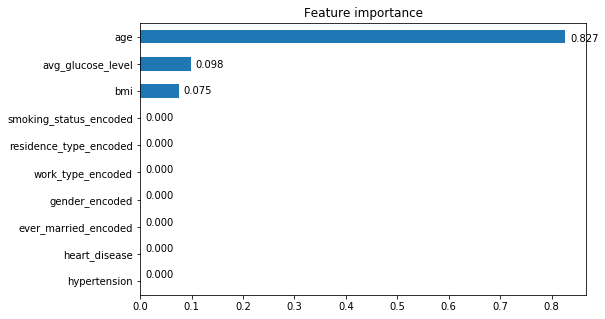

In [123]:
# 컬럼 Feature_importances의 값들을 올림차순으로 정리. 
dft2 = dft.sort_values(by='Feature_importances', ascending=True)   

# 데이터프레임 dft2의 막대그래프(plot.barh) 그리기.
import matplotlib.pyplot as plt
%matplotlib inline
ax = dft2.plot.barh(title="Feature importance", figsize=(8,5))
ax.get_legend().remove()   # 이걸 넣어야 legend box가 하단 좌득에 놓여서 그래프 읽는 것을 방해하는 것을 방지.
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()*0.965),\
                xytext=(5, 10), textcoords='offset points')

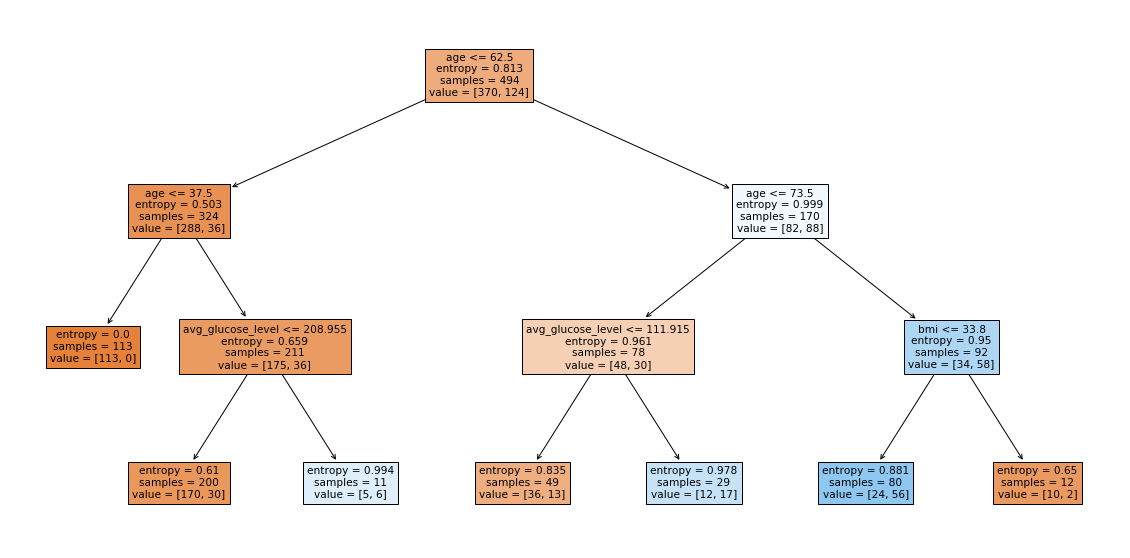

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn import tree

fig = plt.figure(figsize=(20, 10))
_ = tree.plot_tree(best_clf,
                   feature_names=list(data.columns),  
                   filled=True)

In [55]:
y_test.value_counts()

0    371
1    123
Name: stroke, dtype: int64

In [56]:
y_train.value_counts()

0    370
1    124
Name: stroke, dtype: int64

In [133]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [134]:
import graphviz

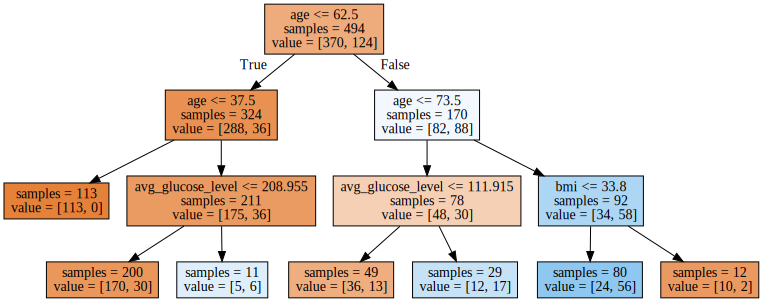

In [125]:
# model의 결과물을 tree.dot에 저장      
from sklearn.tree import export_graphviz 
export_graphviz(best_clf, out_file = "tree.dot",   
                feature_names = list(data.columns), impurity = False , filled = True )

# tree.dot을 graphviz 기능을 통해 디스플레이.
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read() 
display(graphviz.Source(dot_graph)) 